# **Sentimen Analisis Review Game Steam**




# **Import Library**

In [1]:
import requests
import pandas as pd

def get_steam_reviews(app_id, num_reviews=100):
    url = f"https://store.steampowered.com/appreviews/{app_id}"
    reviews = []
    cursor = '*'

    params = {
        'json': 1,
        'filter': 'recent',
        'language': 'english',
        'day_range': 9223372036854775807,
        'review_type': 'all',
        'purchase_type': 'all',
        'num_per_page': 100
    }

    print(f"Fetching reviews for AppID: {app_id}...")

    while len(reviews) < num_reviews:
        params['cursor'] = cursor

        try:
            response = requests.get(url, params=params, timeout=10)
            data = response.json()

            if data.get('success') != 1 or not data.get('reviews'):
                break

            reviews.extend(data['reviews'])
            print(f"Fetched {len(reviews)} reviews...")

            cursor = data.get('cursor')
            if not cursor:
                break

        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    reviews = reviews[:num_reviews]

    df = pd.json_normalize(reviews)

    if 'timestamp_created' in df.columns:
        df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
        df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')

    if 'author.playtime_forever' in df.columns:
        df['playtime_hours'] = df['author.playtime_forever'] / 60

    return df

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Scapping Dataset


In [3]:
game_id = 275850
df = get_steam_reviews(game_id, num_reviews=10000)

Fetching reviews for AppID: 275850...
Fetched 100 reviews...
Fetched 200 reviews...
Fetched 300 reviews...
Fetched 400 reviews...
Fetched 500 reviews...
Fetched 600 reviews...
Fetched 700 reviews...
Fetched 800 reviews...
Fetched 900 reviews...
Fetched 1000 reviews...
Fetched 1100 reviews...
Fetched 1200 reviews...
Fetched 1300 reviews...
Fetched 1400 reviews...
Fetched 1500 reviews...
Fetched 1600 reviews...
Fetched 1700 reviews...
Fetched 1800 reviews...
Fetched 1900 reviews...
Fetched 1999 reviews...
Fetched 2099 reviews...
Fetched 2199 reviews...
Fetched 2299 reviews...
Fetched 2399 reviews...
Fetched 2499 reviews...
Fetched 2599 reviews...
Fetched 2699 reviews...
Fetched 2799 reviews...
Fetched 2899 reviews...
Fetched 2999 reviews...
Fetched 3099 reviews...
Fetched 3199 reviews...
Fetched 3299 reviews...
Fetched 3399 reviews...
Fetched 3499 reviews...
Fetched 3599 reviews...
Fetched 3699 reviews...
Fetched 3799 reviews...
Fetched 3899 reviews...
Fetched 3999 reviews...
Fetched 409

# Loading Dataset

In [4]:
df.to_csv(f"steam_reviews_{game_id}.csv", index=False, encoding='utf-8-sig')

In [5]:
df.head()

,recommendationid,language,appid,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,hardware.cpu_vendor,hardware.cpu_name,hardware.gaming_device_type,hardware.dx_driver_version,hardware.dx_driver_name,hardware.adapter_description,hardware.driver_version,hardware.driver_date,hardware.vram_size,playtime_hours
0,218668686,english,275850,This game is for kids and retar**\r\n\r\n- No ...,2026-02-19 02:34:41,2026-02-19 02:34:41,False,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.050000
1,218668427,english,275850,Just bought this game.\r\nsolid game for its t...,2026-02-19 02:29:09,2026-02-19 02:29:09,True,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.483333
2,218668093,english,275850,confused as hell... but fun,2026-02-19 02:21:46,2026-02-19 02:21:46,True,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600000
3,218667545,english,275850,"definately alot to this game, just getting sta...",2026-02-19 02:10:27,2026-02-19 02:10:27,True,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.383333
4,218667314,english,275850,good,2026-02-19 02:05:12,2026-02-19 02:05:12,True,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.266667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   recommendationid                10000 non-null  object        
 1   language                        10000 non-null  object        
 2   appid                           10000 non-null  int64         
 3   review                          10000 non-null  object        
 4   timestamp_created               10000 non-null  datetime64[ns]
 5   timestamp_updated               10000 non-null  datetime64[ns]
 6   voted_up                        10000 non-null  bool          
 7   votes_up                        10000 non-null  int64         
 8   votes_funny                     10000 non-null  int64         
 9   weighted_vote_score             10000 non-null  object        
 10  comment_count                   10000 non-null  int64         
 11  ste

In [7]:
df_columns_all_nan = df.dropna(axis=1)
df_columns_all_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   recommendationid                10000 non-null  object        
 1   language                        10000 non-null  object        
 2   appid                           10000 non-null  int64         
 3   review                          10000 non-null  object        
 4   timestamp_created               10000 non-null  datetime64[ns]
 5   timestamp_updated               10000 non-null  datetime64[ns]
 6   voted_up                        10000 non-null  bool          
 7   votes_up                        10000 non-null  int64         
 8   votes_funny                     10000 non-null  int64         
 9   weighted_vote_score             10000 non-null  object        
 10  comment_count                   10000 non-null  int64         
 11  ste

In [8]:
df_columns_all_nan

,recommendationid,language,appid,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,author.persona_status,author.profile_url,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,author.avatar,playtime_hours
0,218668686,english,275850,This game is for kids and retar**\r\n\r\n- No ...,2026-02-19 02:34:41,2026-02-19 02:34:41,False,0,0,0.5,...,online,https://steamcommunity.com/id/prince24earth/,223,94,363,363,363,1771429417,https://avatars.fastly.steamstatic.com/90f5702...,6.050000
1,218668427,english,275850,Just bought this game.\r\nsolid game for its t...,2026-02-19 02:29:09,2026-02-19 02:29:09,True,0,0,0.5,...,online,https://steamcommunity.com/profiles/7656119803...,0,5,749,749,749,1771374321,https://avatars.fastly.steamstatic.com/0bfd6a0...,12.483333
2,218668093,english,275850,confused as hell... but fun,2026-02-19 02:21:46,2026-02-19 02:21:46,True,0,0,0.5,...,offline,https://steamcommunity.com/profiles/7656119910...,0,4,576,576,575,1771468966,https://avatars.fastly.steamstatic.com/34b8c78...,9.600000
3,218667545,english,275850,"definately alot to this game, just getting sta...",2026-02-19 02:10:27,2026-02-19 02:10:27,True,0,0,0.5,...,online,https://steamcommunity.com/profiles/7656119880...,0,3,1463,1463,1433,1771469144,https://avatars.fastly.steamstatic.com/fef49e7...,24.383333
4,218667314,english,275850,good,2026-02-19 02:05:12,2026-02-19 02:05:12,True,0,0,0.5,...,offline,https://steamcommunity.com/id/max0max0max/,0,17,9976,0,9976,1764518658,https://avatars.fastly.steamstatic.com/3f47c36...,166.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,206994046,english,275850,Space,2025-10-18 10:08:07,2025-10-18 10:08:07,True,0,0,0.5,...,offline,https://steamcommunity.com/profiles/7656119835...,0,12,16895,0,1774,1764466576,https://avatars.fastly.steamstatic.com/5e5d174...,281.583333
9996,206991877,english,275850,"Amazing game, great story and endless planets",2025-10-18 09:28:41,2025-10-18 09:28:41,True,1,0,0.523809552192687988,...,offline,https://steamcommunity.com/id/lysvion/,17,3,5517,34,3642,1771270397,https://avatars.fastly.steamstatic.com/53bb75c...,91.950000
9997,206991595,english,275850,Best RPG ever,2025-10-18 09:22:50,2025-10-18 09:22:50,True,0,0,0.5,...,offline,https://steamcommunity.com/profiles/7656119814...,24,5,4942,0,2287,1761432358,https://avatars.fastly.steamstatic.com/9978d0f...,82.366667
9998,206989041,english,275850,"🌌 ""From Redemption to Excellence"" 🚀\n\nAfter y...",2025-10-18 08:34:14,2025-11-25 20:46:24,True,0,0,0.5,...,online,https://steamcommunity.com/id/b0bert/,290,34,11957,0,11889,1764120291,https://avatars.fastly.steamstatic.com/9b40972...,199.283333


In [9]:
clean_df = df_columns_all_nan.dropna()

In [10]:
import numpy as np

columns_for_duplicates = clean_df.columns.drop('reactions')
clean_df = clean_df.drop_duplicates(subset=columns_for_duplicates)

##Preprocessing

In [11]:
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer (Porter Stemmer for English)
    stemmer = PorterStemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
slangwords = {"ate":"did something very well","banger":"a great song or movie","bae":"a significant other or crush","basic":"preferring mainstream or unoriginal things","beef":"to have an argument or conflict with someone","bestie":"best friend","bet":"an expression of agreement","big mad":"very angry","blimey":"an expression of surprise","bloody":"used for emphasis","blue":"sad or depressed","bomb":"excellent or high quality","boomer":"an older person perceived as out of touch","boot":"to vomit","boujee":"high class or luxurious","bruh":"an expression of disbelief or annoyance","bud":"friend","bussin":"extremely delicious","cap":"a lie","cheers":"thank you or goodbye","cheesy":"silly or cheap","chill":"to relax","chuffed":"very pleased or happy","clout":"fame or social influence","clutch":"happening at exactly the right time","cringe":"socially awkward or embarrassing","curve":"to reject someone","dead":"something was extremely funny","delulu":"delusional","dig":"to like or understand something","dis":"to disrespect someone","ditch":"to leave unexpectedly","dog":"a close friend","dope":"cool or awesome","drip":"stylish clothing or appearance","extra":"over the top or dramatic","faded":"under the influence","fam":"close friends or family","finsta":"a fake instagram account","fire":"amazing or trendy","fit":"an outfit or attractive person","flex":"to show off","fomo":"fear of missing out","for real":"honestly or truthfully","full send":"to do something with full effort","gagged":"shocked or amazed","gas":"to compliment someone","ghosted":"ending a relationship by ignoring texts","glow up":"a major positive transformation","goat":"greatest of all time","gucci":"good or fine","hard pass":"a firm no","high key":"openly or intensely","hype":"very excited","iced out":"wearing lots of jewelry","it slaps":"high quality music","its giving":"it has the vibe of","karen":"an entitled or demanding person","keep it 100":"to be completely honest","knackered":"exhausted","lit":"exciting or amazing","low key":"secretly or slightly","mate":"friend","mid":"average or mediocre","mood":"something relatable","no cap":"not lying","on fleek":"perfectly executed","on god":"swearing to the truth","opps":"enemies or opposition","periodt":"end of discussion","pissed":"angry or drunk","pull":"to attract a partner","pull up":"to arrive at a location","ratio":"when a reply gets more likes than the post","receipts":"proof of a conversation","rent free":"thinking about something constantly","rizz":"charisma","salty":"annoyed or upset","savage":"ruthless or very cool","shook":"shocked or surprised","shotgun":"the front passenger seat","simp":"doing too much for a crush","slay":"doing a great job","snack":"an attractive person","snatched":"looking very good","squad":"group of friends","stan":"an obsessive fan","sus":"shady or questionable","tea":"gossip","thirsty":"desperate for attention","tight":"cool or close","trash":"very bad quality","troll":"someone who baits people online","tweak":"to act crazy or overreact","vibe check":"assessing the energy","vibing":"chilling and enjoying the moment","wicked":"cool or very","wig":"expression of shock","woke":"aware of social issues","yeet":"to throw something with force","zombieing":"when a ghost returns to text you","bread":"money","bags":"large amounts of money","ballin":"living a wealthy lifestyle","noob":"a beginner or inexperienced person","tweaking":"acting irrational","wrecked":"badly beaten or exhausted","zero chill":"having no restraint","zooted":"very intoxicated"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [13]:
clean_df

,recommendationid,language,appid,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,author.persona_status,author.profile_url,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,author.avatar,playtime_hours
0,218668686,english,275850,This game is for kids and retar**\r\n\r\n- No ...,2026-02-19 02:34:41,2026-02-19 02:34:41,False,0,0,0.5,...,online,https://steamcommunity.com/id/prince24earth/,223,94,363,363,363,1771429417,https://avatars.fastly.steamstatic.com/90f5702...,6.050000
1,218668427,english,275850,Just bought this game.\r\nsolid game for its t...,2026-02-19 02:29:09,2026-02-19 02:29:09,True,0,0,0.5,...,online,https://steamcommunity.com/profiles/7656119803...,0,5,749,749,749,1771374321,https://avatars.fastly.steamstatic.com/0bfd6a0...,12.483333
2,218668093,english,275850,confused as hell... but fun,2026-02-19 02:21:46,2026-02-19 02:21:46,True,0,0,0.5,...,offline,https://steamcommunity.com/profiles/7656119910...,0,4,576,576,575,1771468966,https://avatars.fastly.steamstatic.com/34b8c78...,9.600000
3,218667545,english,275850,"definately alot to this game, just getting sta...",2026-02-19 02:10:27,2026-02-19 02:10:27,True,0,0,0.5,...,online,https://steamcommunity.com/profiles/7656119880...,0,3,1463,1463,1433,1771469144,https://avatars.fastly.steamstatic.com/fef49e7...,24.383333
4,218667314,english,275850,good,2026-02-19 02:05:12,2026-02-19 02:05:12,True,0,0,0.5,...,offline,https://steamcommunity.com/id/max0max0max/,0,17,9976,0,9976,1764518658,https://avatars.fastly.steamstatic.com/3f47c36...,166.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,206994046,english,275850,Space,2025-10-18 10:08:07,2025-10-18 10:08:07,True,0,0,0.5,...,offline,https://steamcommunity.com/profiles/7656119835...,0,12,16895,0,1774,1764466576,https://avatars.fastly.steamstatic.com/5e5d174...,281.583333
9996,206991877,english,275850,"Amazing game, great story and endless planets",2025-10-18 09:28:41,2025-10-18 09:28:41,True,1,0,0.523809552192687988,...,offline,https://steamcommunity.com/id/lysvion/,17,3,5517,34,3642,1771270397,https://avatars.fastly.steamstatic.com/53bb75c...,91.950000
9997,206991595,english,275850,Best RPG ever,2025-10-18 09:22:50,2025-10-18 09:22:50,True,0,0,0.5,...,offline,https://steamcommunity.com/profiles/7656119814...,24,5,4942,0,2287,1761432358,https://avatars.fastly.steamstatic.com/9978d0f...,82.366667
9998,206989041,english,275850,"🌌 ""From Redemption to Excellence"" 🚀\n\nAfter y...",2025-10-18 08:34:14,2025-11-25 20:46:24,True,0,0,0.5,...,online,https://steamcommunity.com/id/b0bert/,290,34,11957,0,11889,1764120291,https://avatars.fastly.steamstatic.com/9b40972...,199.283333


In [14]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['review'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [15]:
clean_df['text_akhir']

,text_akhir
0,game kids retar visible goal coop system mess ...
1,bought game solid game type spend lot time gam...
2,confused hell fun
3,definately alot game getting started
4,good
...,...
9995,space
9996,amazing game great story endless planets
9997,best rpg ever
9998,redemption excellence years updates mans sky t...


##Pelabelan

In [16]:
import csv
from io import StringIO

positive_words = pd.read_csv('english-positive.csv', header=None)
lexicon_positive = dict({word: 1 for word in positive_words[0]})

negative_words = pd.read_csv('english-negative.csv', header=None)
lexicon_negative = dict({word: -1 for word in negative_words[0]})


In [17]:
def sentiment_analysis_lexicon(text):
    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity = ''

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'

    return score, polarity

In [18]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    9835
negative     165
Name: count, dtype: int64


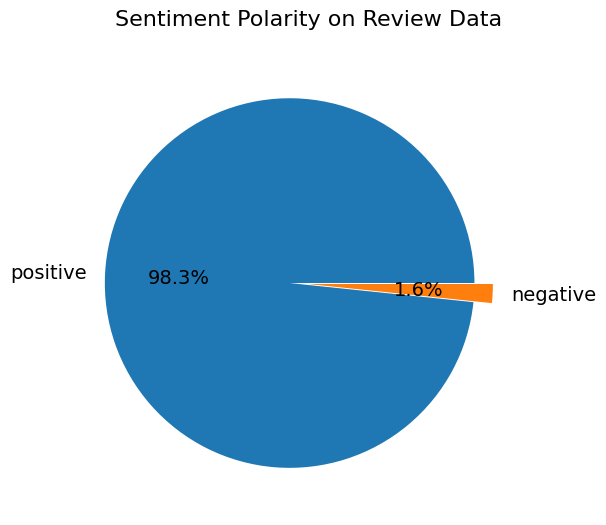

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0.1, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

In [20]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [21]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

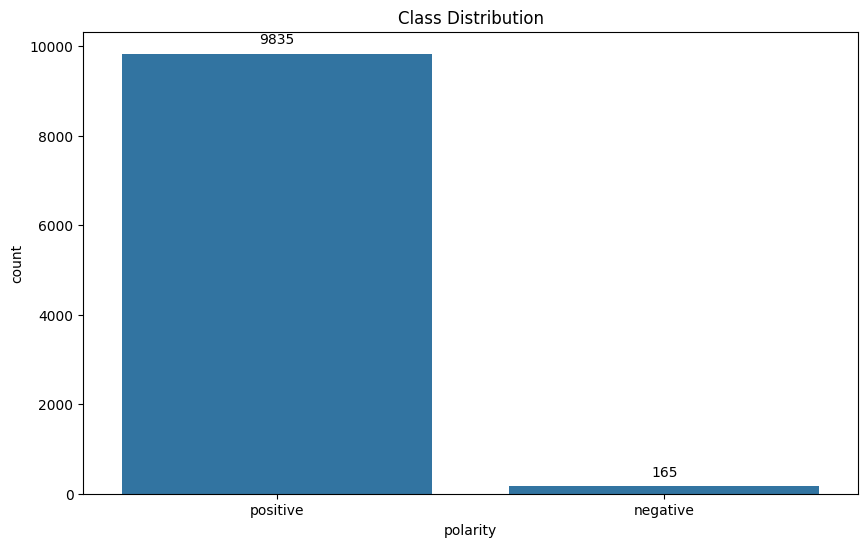

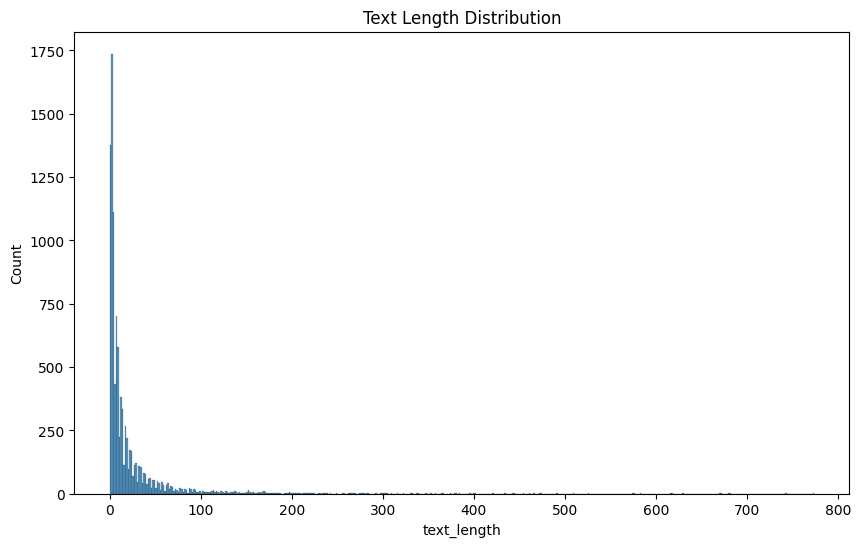

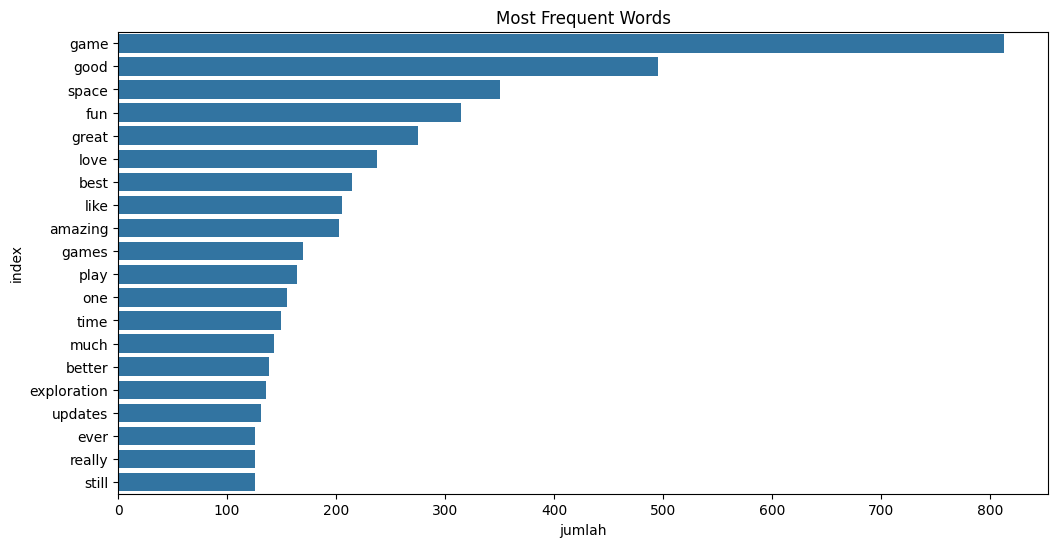

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))

class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

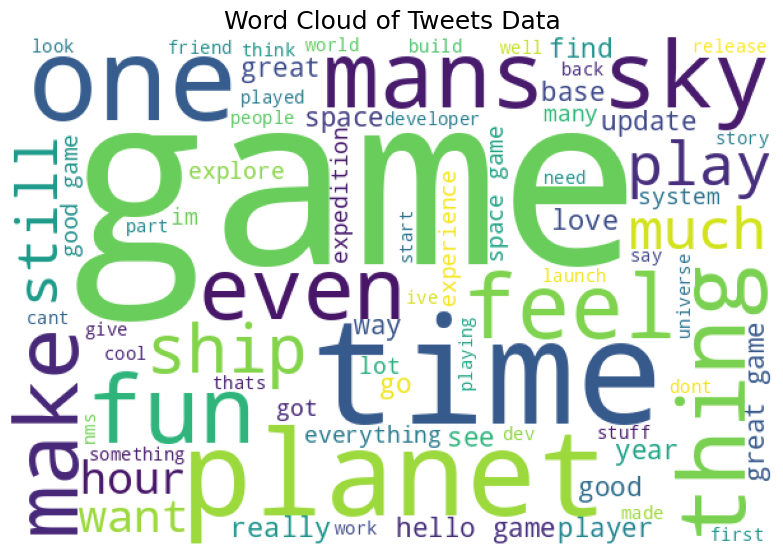

In [23]:
from wordcloud import WordCloud

list_words = ''

for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

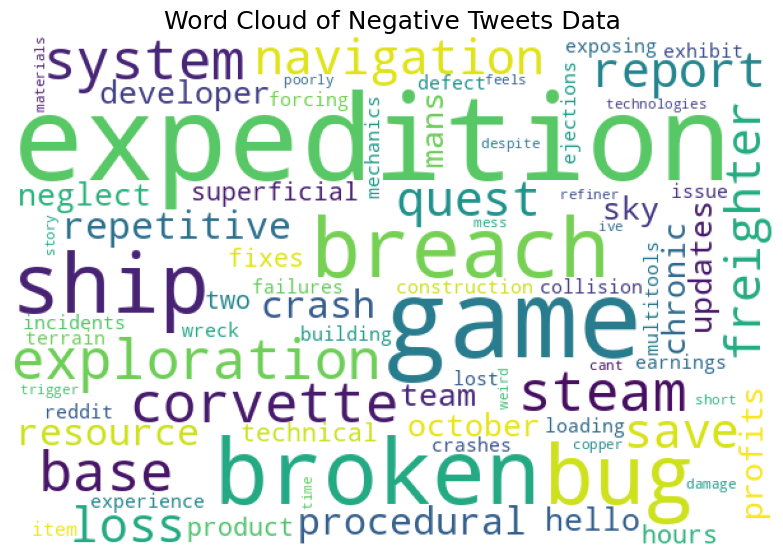

In [24]:
list_words = ''

for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

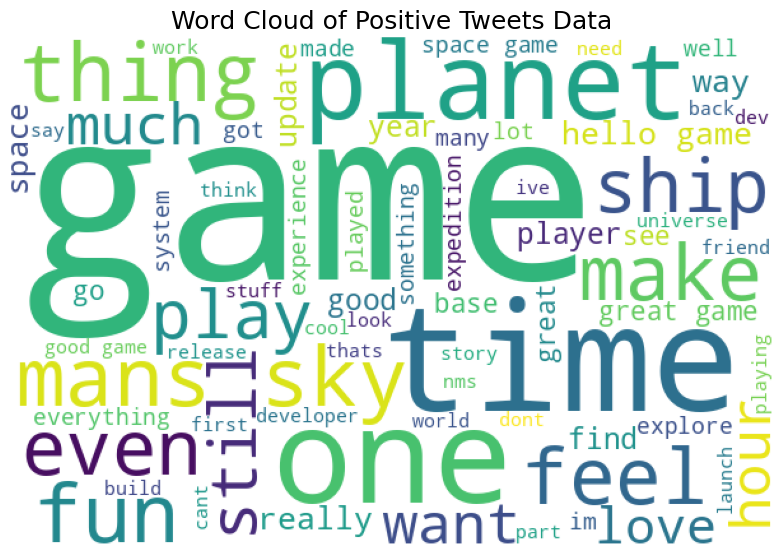

In [25]:
list_words = ''

for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## **Data Splitting**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

# TF-DF Splitting

In [27]:
X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Skema #1 Naive Bayes TF-IDF 80/20**

In [28]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()

naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.871
Naive Bayes - accuracy_test: 0.867


## **Skema #2 Random Forest TF-IDF 80/20**

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.991875
Random Forest - accuracy_test: 0.986


# Word2Vec Splitting

In [30]:
pip install gensim

In [31]:
from gensim.models import Word2Vec
import numpy as np

sent = [row.split() for row in clean_df['text_akhir']]

w2v_model = Word2Vec(sent, vector_size=100, window=5, min_count=2, workers=4)

def make_feature_vec(words, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    nwords = 0

    index2word_set = set(model.wv.index_to_key)

    for word in words:
        if word in index2word_set:
            nwords = nwords + 1
            feature_vec = np.add(feature_vec, model.wv[word])

    if nwords > 0:
        feature_vec = np.divide(feature_vec, nwords)
    return feature_vec

vector_size = 100
X_word2vec = np.array([make_feature_vec(s, w2v_model, vector_size) for s in sent])

y = clean_df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

## **Skema #3 Random Forest Word2Vec 80/20**

In [32]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.9855
